# Boom Bikes

In [1]:
#importing libraries
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\UPGRAD CSV\day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,5,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,6,0,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,0,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,1,1,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,2,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [5]:
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [9]:
df.size

11680

In [10]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [11]:
df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

In [12]:
##There are 730 rows and 16 columns in the data set. There are no null values in any of the columns.

In [13]:
#Dropping unneccasry columns 
# instant is just a row instance identifier.
# dteday is removed as we have some of date features like mnth and year and weekday already in other columns
#and also for this analysis we will not consider day to day trend in demand for bikes.
# casual and registered variables are not available at the time of prediction and also these describe the target variable
#cnt in a very trivial way target = casual + registered, which leads to data leakage.

In [14]:
#checking How old business is
df['days_old'] = (pd.to_datetime(df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [15]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_old
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [16]:
# Droping instant column as it is index column which has nothing to do with target
df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

df.drop(['casual'], axis = 1, inplace = True)
df.drop(['registered'], axis = 1, inplace = True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [18]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [19]:
df.weathersit.value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [20]:
df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183,-0.001182
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640,-0.015171
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


In [21]:
##Insight
## we can see that features like season, mnth, weekday and weathersit are integers although they should be
#non-numerical categories.

# Handling Missing values

In [22]:
df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

In [23]:
#There are no null values

In [24]:
df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

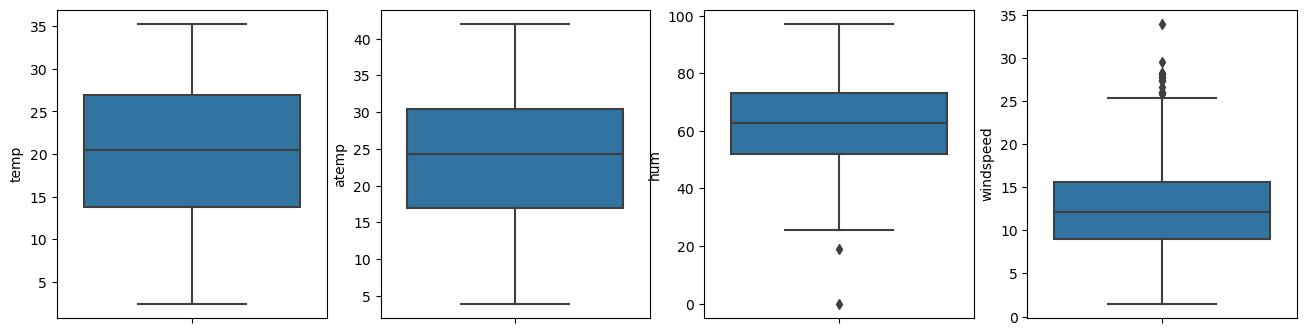

In [25]:
#independent variables with continous variables

cols= ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(16,4))

i =1 
for col in cols:
    plt.subplot(1, 4, i)
    sns.boxplot(y= col, data= df)
    i+=1

In [26]:
#From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

# EDA

In [27]:
#Convert season and weathersit to categorical types

In [28]:
df.season.replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'}, inplace= True)

df.weathersit.replace({1 : 'good', 2: 'moderate', 3: 'bad', 4: 'serve'}, inplace= True)

df.mnth = df.mnth.replace({1:'jan', 2:'feb', 3:'mar', 4:'apr', 5:'may', 6:'jun', 7:'jul', 8:'aug', 9:'sep', 10:'oct', 11:'nov', 12:'dec'})

df.weekday= df.weekday.replace({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})

In [29]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_old
0,spring,0,jan,0,mon,1,moderate,14.110847,18.18125,80.5833,10.749882,985,0
1,spring,0,jan,0,tue,1,moderate,14.902598,17.68695,69.6087,16.652113,801,1
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349,2
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562,3
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600,4


In [30]:
#Pairplots to check linear relationships

<Figure size 1500x3000 with 0 Axes>

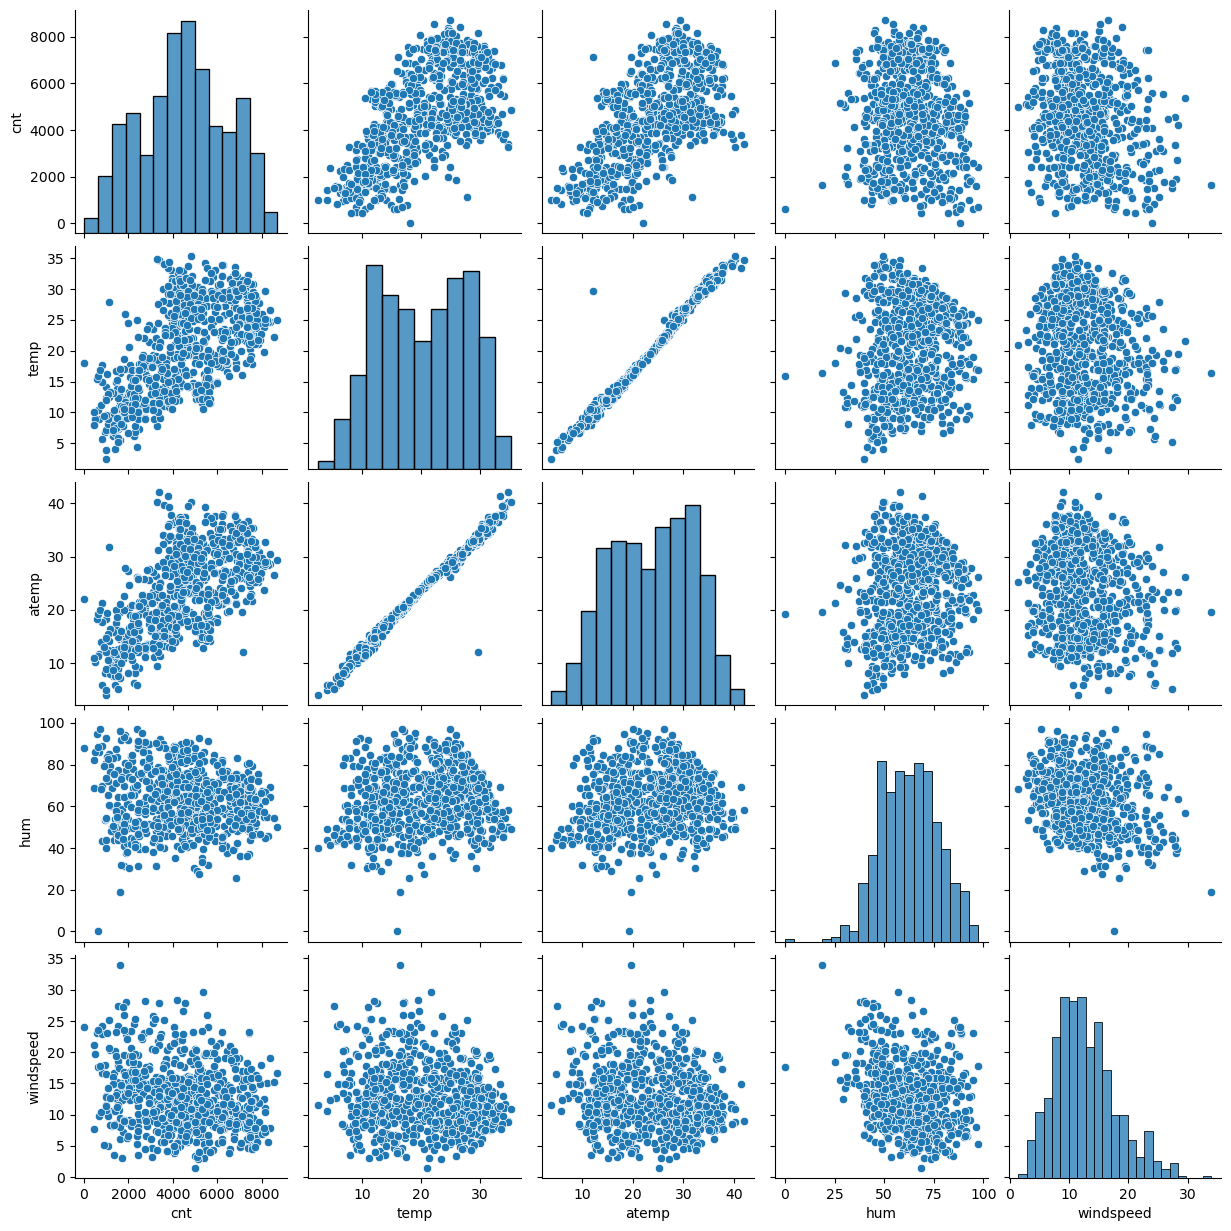

In [31]:
plt.figure(figsize=(15,30))
sns.pairplot(data= df , vars=['cnt', 'temp', 'atemp', 'hum', 'windspeed'])
plt.show()

# Insight

In [32]:
#Looks like the temp and atemp has the highest corelation with the target variable cnt
#temp and atemp are highly co-related with each other

In [33]:
#As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp.

<Figure size 2000x1500 with 0 Axes>

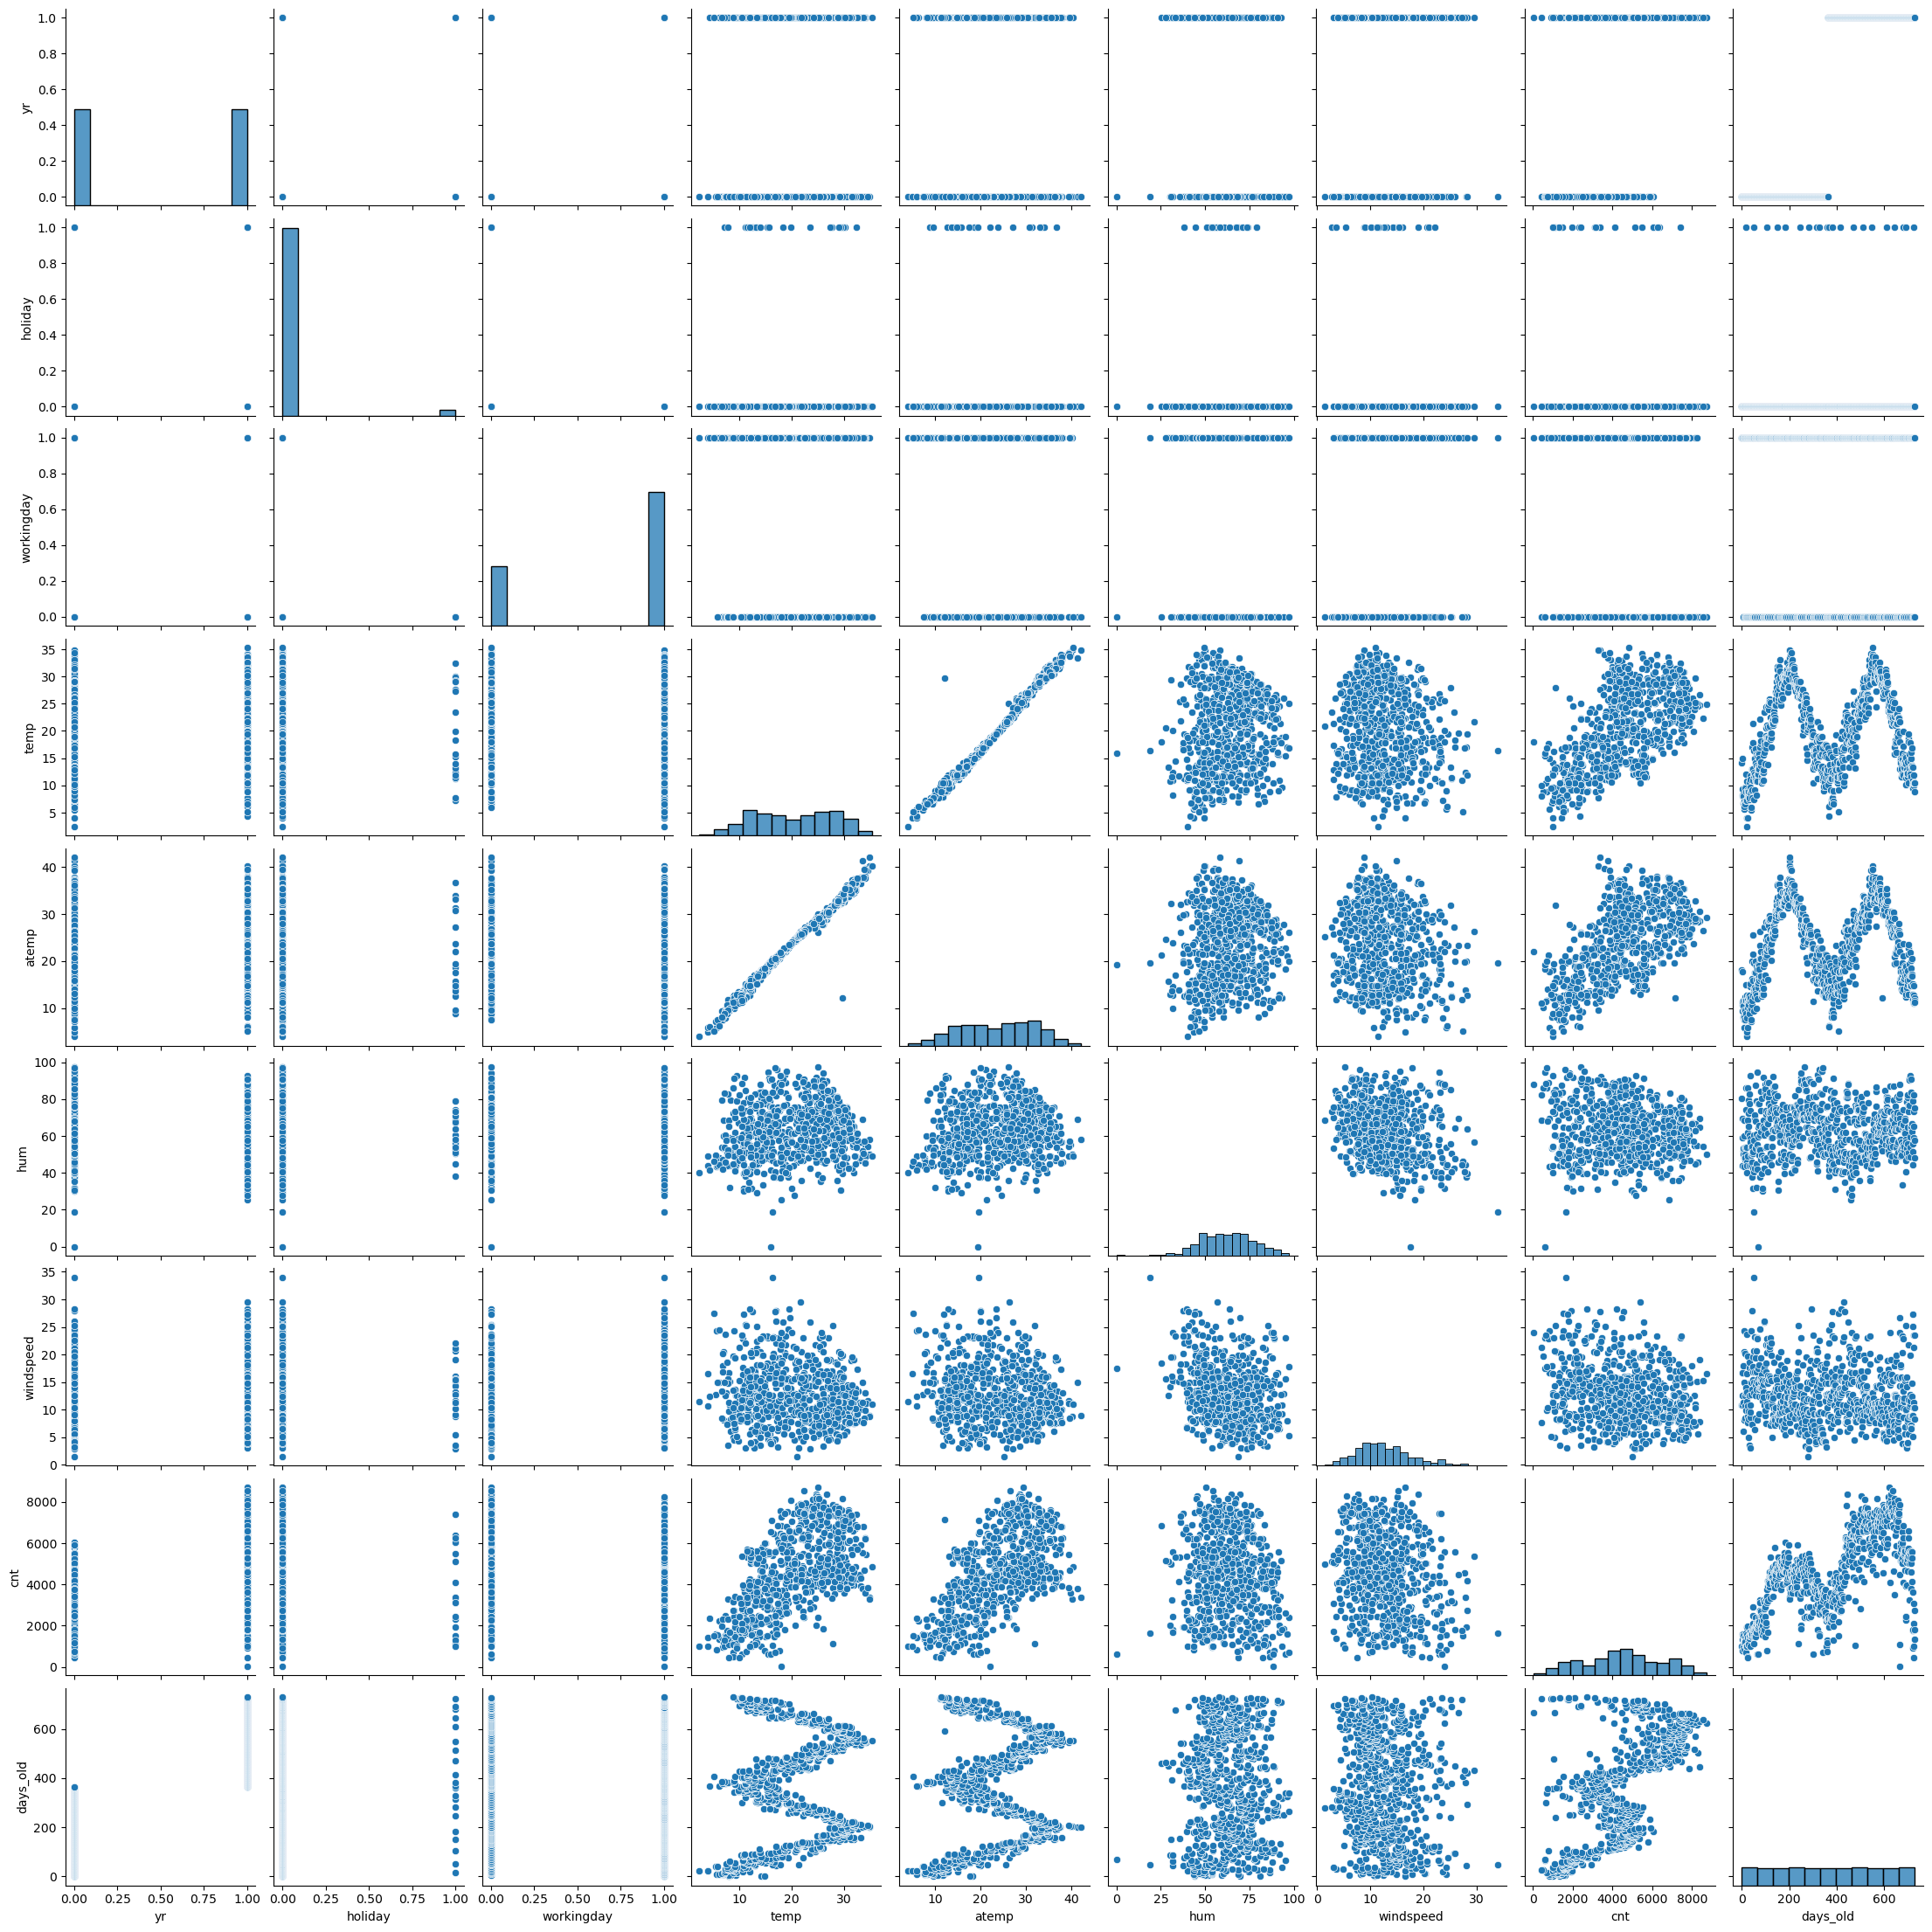

In [34]:
#Visulasing the data to check corelation between numerical value

plt.figure(figsize=(20,15))
sns.pairplot(df)

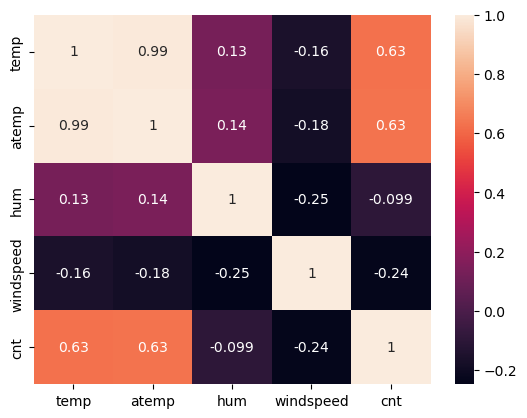

In [35]:
#Checking continous variable relationships

sns.heatmap(df[['temp', 'atemp', 'hum', 'windspeed','cnt']].corr(), annot =True)
plt.show()

# Insight

In [36]:
##Here we can see that temp and atemp has correlation more than .99 means almost 1 (highly correlated) 
#and atemp seems to be derived from temp so atemp field can be dropped here only

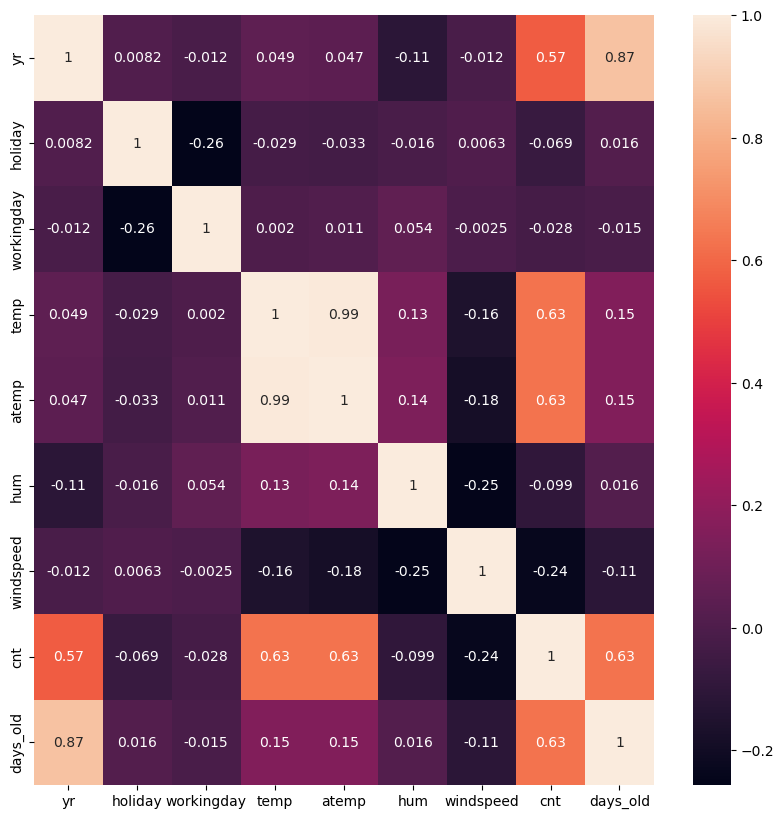

In [37]:
#Correlations for numeric values
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor, annot =True)
plt.show()

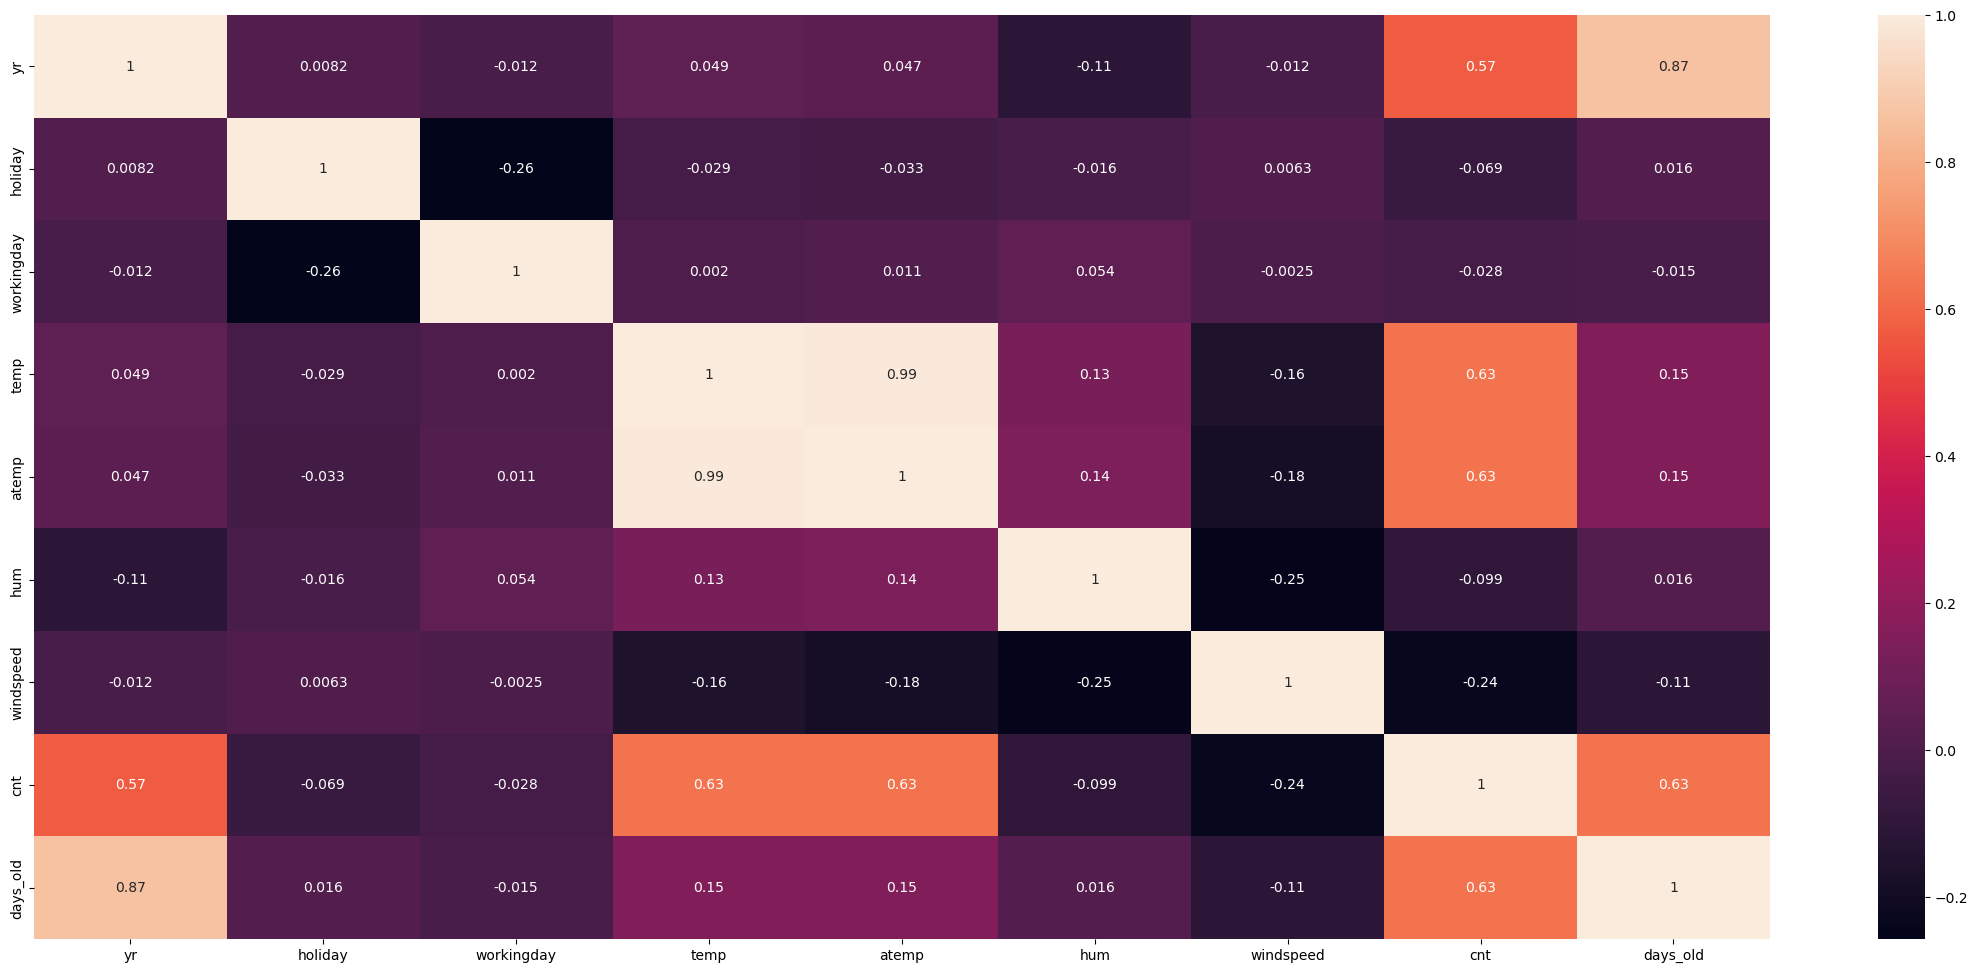

In [38]:
#Heatmap of correlation between variables

corr=df.corr()
plt.figure(figsize=(28,12))

sns.heatmap(corr, annot=True)
plt.show()

# Insight

In [39]:
##### From the correlation map, temp, atemp and days_old seems to be highly correlated and only should variable can be 
##considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.
#We also see Target variable has a linear relationship with some of the  indeptendent variables. 
#Good sign for building a linear regression Model.

# Analysing Categorical variable with target variable 

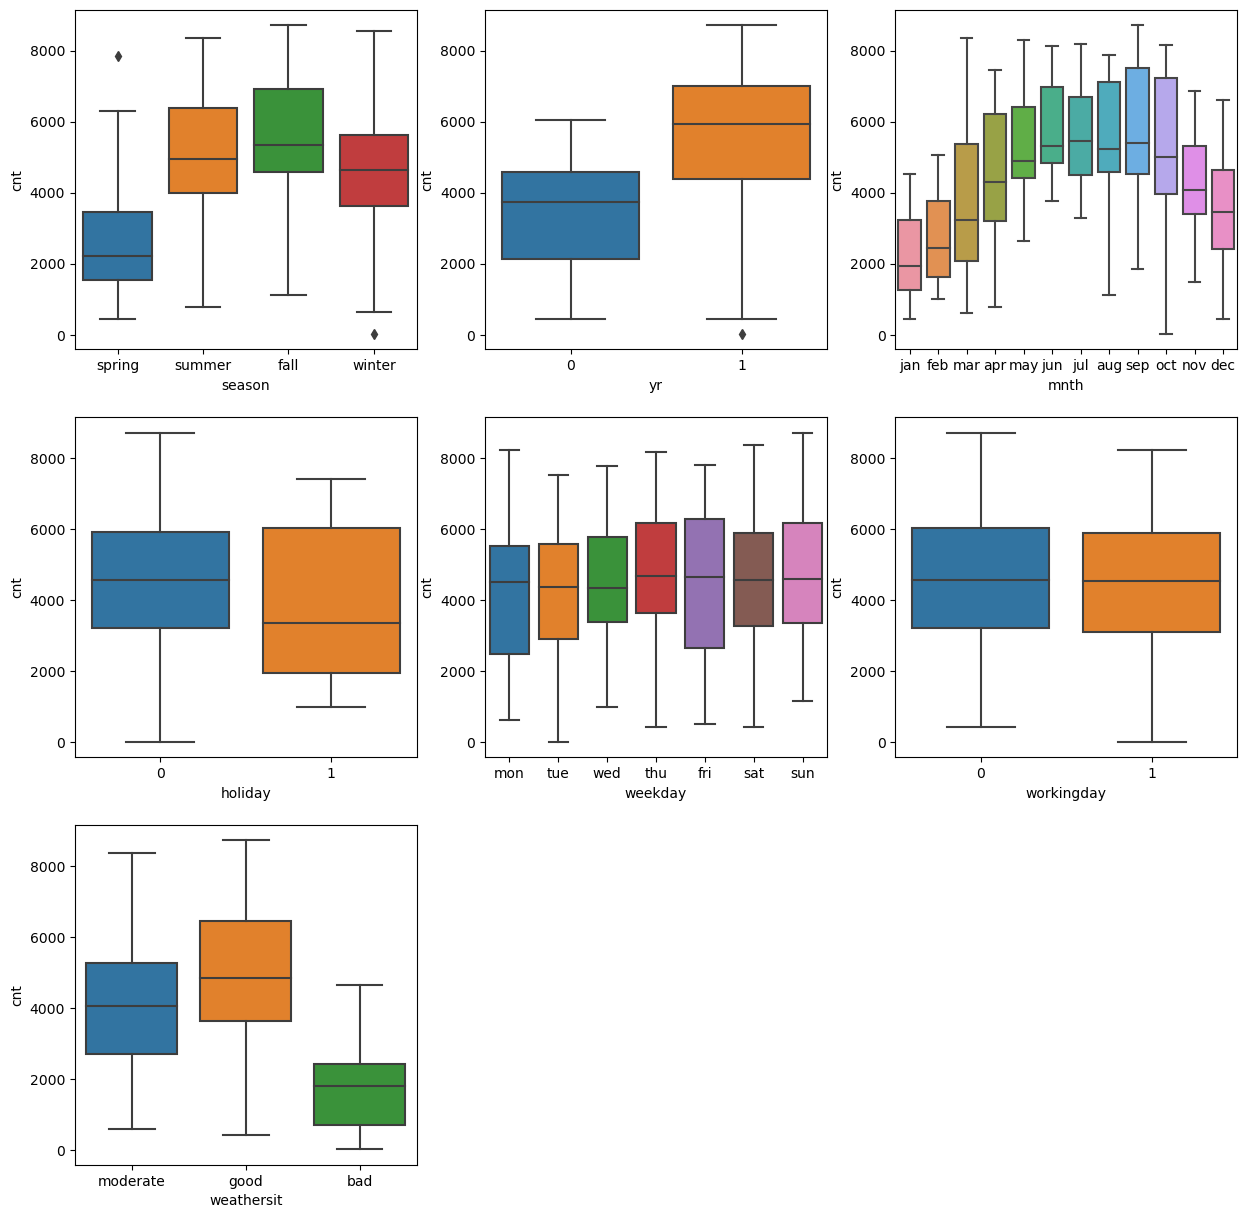

In [40]:
plt.figure(figsize=(15, 15))
var_cat=['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
for i in enumerate(var_cat):
    plt.subplot(3,3, i[0]+1)
    sns.boxplot(data=df, x=i[1], y= 'cnt')
plt.show()

# Insight

In [41]:
#Here many insights can be drawn from the plots
#1. Season: 3: fall has highest demand for rental bikes
#2. I see that demand for next year has grown
#3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing
#4. When there is a holiday, demand has decreased.
#5. Weekday is not giving clear picture abount demand.
#6. The clear weathershit has highest demand
#7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions.

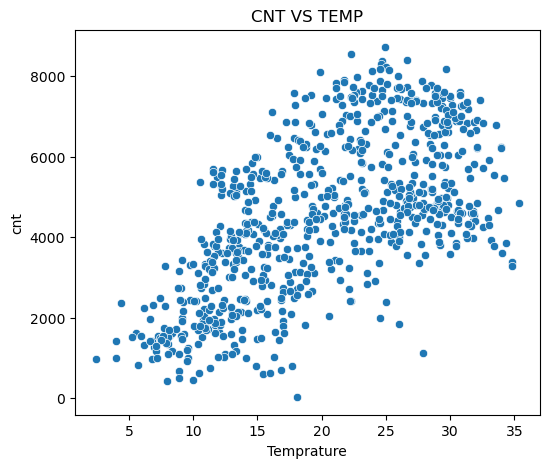

In [42]:
plt.figure(figsize=(6,5))
plt.title("CNT VS TEMP")
sns.scatterplot(data=df, y="cnt", x="temp")
plt.xlabel("Temprature")
plt.show()

# Insight

In [43]:
#Demand for bikes is positively correlated to temp.
#We can see that cnt is linearly increasing with temp indicating linear relation.

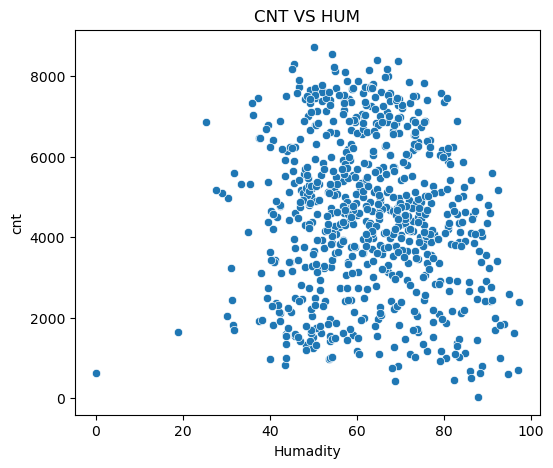

In [44]:
plt.figure(figsize=(6,5))
plt.title("CNT VS HUM")
sns.scatterplot(data=df, y="cnt", x="hum")
plt.xlabel("Humadity")
plt.show()

# Insight

In [45]:
#Hum is values are more scattered around.
#Although we can see cnt decreasing with increase in humidity.

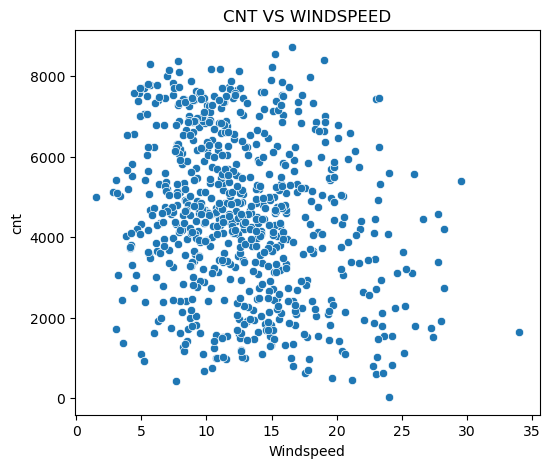

In [46]:
plt.figure(figsize=(6,5))
plt.title("CNT VS WINDSPEED")
sns.scatterplot(data=df, y="cnt", x="windspeed")
plt.xlabel("Windspeed")
plt.show()

# Insight

In [47]:
#Windspeed is values are more scattered around.
#Although we can see cnt decreasing with increase in windspeed

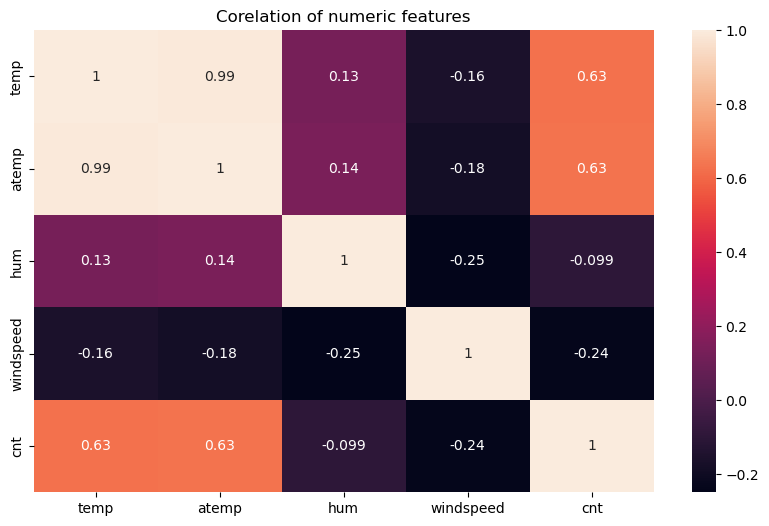

In [48]:
plt.figure(figsize=(10,6))
num_feat = ["temp", "atemp", "hum", "windspeed", "cnt"]
plt.title("Corelation of numeric features")
sns.heatmap(df[num_feat].corr(), annot=True)
plt.show()

# Insight

In [49]:
#Temp and Atemp are highly correlated, we can take an action to remove one of them, but lets keep them for further analysis.
#Temp and Atemp also have high correlation with cnt variable.

In [50]:
df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.690411,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.462641,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


# Data preparation for Linear Regression

In [51]:
#Create dummy variables for all categorical variables 

In [52]:
df=pd.get_dummies(data= df, columns=["season", "mnth", "weekday"], drop_first=True)
df=pd.get_dummies(data=df, columns=["weathersit"])

In [53]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [54]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_old,season_spring,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,1,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,1,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,1,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,1,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,1,...,0,0,0,0,0,0,0,0,1,0


# Model Building

# Split into Train and Test 

In [55]:
df.shape

(730, 32)

In [56]:
y=df.pop('cnt')

#X is all remainign variable also our independent variables
x=df

#Train Test split with 70:30 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [57]:
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


# Features Scaling Continous variable

In [58]:
#To make all features in same scale to interpret easily
#Following columns are continous to be scaled - temp, hum, windspeed

In [59]:
# Importing required library
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [60]:
#Let us scale the continous variable 

num_var = ['temp', 'atemp', 'hum', 'windspeed', 'days_old']

#use normalizes for scaler 
scaler= MinMaxScaler()

#Fit and transform 
X_train[num_var] = scaler.fit_transform(X_train[num_var])

In [61]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.00000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.698630,0.550874,0.526518,0.654174,0.414873,0.512409,0.230920,0.258317,...,0.09002,0.148728,0.142857,0.133072,0.135029,0.156556,0.133072,0.029354,0.624266,0.346380
std,0.500067,0.163398,0.459303,0.227231,0.212976,0.143648,0.185619,0.292268,0.421834,0.438138,...,0.28649,0.356169,0.350270,0.339986,0.342090,0.363738,0.339986,0.168963,0.484786,0.476282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233,0.000000,1.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [62]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,0,0,...,0,0,0,0,0,0,0,0,0,1
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,0,0,...,0,0,0,0,0,1,0,0,0,1
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,0,1,...,0,0,0,0,0,0,1,0,1,0
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,1,0,...,0,0,0,0,1,0,0,0,0,1
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,0,0,...,0,0,0,0,1,0,0,0,0,1


# Build a Model using RFE and Automated approach

#### Use RFE to eliminate some columns

In [63]:
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [64]:
rfe=RFE(lr,n_features_to_select=15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [65]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 15),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 13),
 ('season_winter', True, 1),
 ('mnth_aug', False, 4),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 11),
 ('mnth_jan', False, 7),
 ('mnth_jul', False, 12),
 ('mnth_jun', False, 5),
 ('mnth_mar', True, 1),
 ('mnth_may', True, 1),
 ('mnth_nov', False, 3),
 ('mnth_oct', True, 1),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 8),
 ('weekday_sat', False, 16),
 ('weekday_sun', False, 14),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 9),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', False, 6)]

# Manual elimination

In [66]:
def build_model(col):
    X_train_sm = sm.add_constant(X_train[col])
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm

# Function to calculate VIF

In [67]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(col):
    df1 = X_train[col]
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

In [68]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_old',
       'season_spring', 'season_winter', 'mnth_mar', 'mnth_may', 'mnth_oct',
       'mnth_sep', 'weathersit_bad', 'weathersit_good'],
      dtype='object')

In [69]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['workingday', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb',
       'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_nov', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_moderate'],
      dtype='object')

In [70]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [71]:
X_train_rfe.shape

(511, 14)

# Build model

In [72]:
#Selected columns for Model 1 - all columns selected by RFE
col = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(col)
get_vif(col)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     168.4
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          4.11e-178
Time:                        19:12:07   Log-Likelihood:                -4145.6
No. Observations:                 511   AIC:                             8321.
Df Residuals:                     496   BIC:                             8385.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2956.7514    

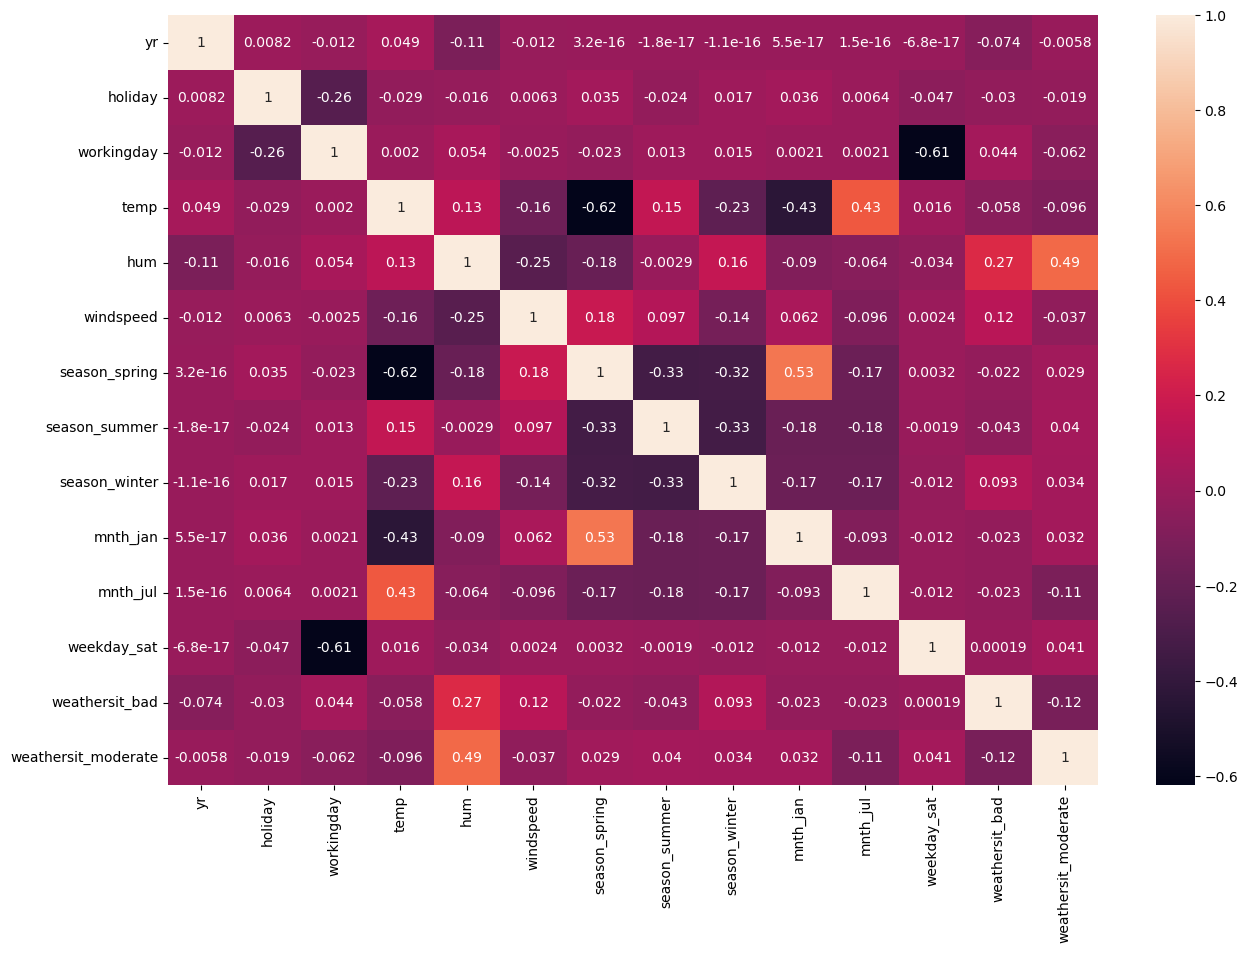

In [73]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(df[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), annot=True)
plt.show()

# Model 2

In [74]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
col = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(col)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.6
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          3.18e-179
Time:                        19:12:10   Log-Likelihood:                -4145.7
No. Observations:                 511   AIC:                             8319.
Df Residuals:                     497   BIC:                             8379.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2940.4773    

# Model 3

# All the columns have p-value > .05 so checking VIFs

In [75]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     191.1
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.26e-177
Time:                        19:12:10   Log-Likelihood:                -4152.2
No. Observations:                 511   AIC:                             8330.
Df Residuals:                     498   BIC:                             8386.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2219.0789    

# Module 4

In [76]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     191.1
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.26e-177
Time:                        19:12:10   Log-Likelihood:                -4152.2
No. Observations:                 511   AIC:                             8330.
Df Residuals:                     498   BIC:                             8386.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2219.0789    

# Model 5

In [77]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     191.1
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.26e-177
Time:                        19:12:10   Log-Likelihood:                -4152.2
No. Observations:                 511   AIC:                             8330.
Df Residuals:                     498   BIC:                             8386.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2219.0789    

# Model 6

In [78]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     191.1
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.26e-177
Time:                        19:12:11   Log-Likelihood:                -4152.2
No. Observations:                 511   AIC:                             8330.
Df Residuals:                     498   BIC:                             8386.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2219.0789    

# Model 7

In [79]:
## Trying to replace July with spring as both were highly correlated

cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     58.92
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           6.22e-73
Time:                        19:12:11   Log-Likelihood:                -4408.2
No. Observations:                 511   AIC:                             8836.
Df Residuals:                     501   BIC:                             8879.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3875.9227    

# Model 8

In [80]:
## Trying to replace July with spring as both were highly correlated

cols = ['yr', 'workingday', 'windspeed', 'mnth_jul',
       'season_summer', 'season_winter', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     58.92
Date:                Sun, 23 Jul 2023   Prob (F-statistic):           6.22e-73
Time:                        19:12:11   Log-Likelihood:                -4408.2
No. Observations:                 511   AIC:                             8836.
Df Residuals:                     501   BIC:                             8879.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3875.9227    

# Model 9

In [81]:
# Removing windspeed with spring as windspeed was highly correlated with temp
cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     158.1
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          3.09e-140
Time:                        19:12:11   Log-Likelihood:                -4248.8
No. Observations:                 511   AIC:                             8518.
Df Residuals:                     501   BIC:                             8560.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4887.4180    

# Model 10

In [82]:
# using the weekend "Sunday" which was dropped during RFE instead of Saturday.

cols = ['yr', 'workingday', 'season_spring', 'mnth_jul',
       'season_summer', 'season_winter', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     157.7
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          5.03e-140
Time:                        19:12:11   Log-Likelihood:                -4249.3
No. Observations:                 511   AIC:                             8519.
Df Residuals:                     501   BIC:                             8561.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                4939.3423    

# Model 11

In [83]:
# adding temp and removed 'season_summer' and 'workingday'
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     270.2
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.81e-176
Time:                        19:12:11   Log-Likelihood:                -4166.3
No. Observations:                 511   AIC:                             8351.
Df Residuals:                     502   BIC:                             8389.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1673.8749    

# Insight

In [84]:
##Here VIF seems to be almost accepted. p-value for all the features is  almost 0.0 and R2 is 0.821 
##Let us select Model 11 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), 
#along with no insignificant variables and no multi coliinear (high VIF) variables. 
##Difference between R-squared and Adjusted R-squared values for this model is veryless, 
#which also means that there are no additional parameters that can be removed from this model.

In [85]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [86]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1673.8749147275485 [ 2000.53647133 -1163.49220058  -622.79183983   509.10732037
   196.38556459 -2243.51327536  -655.87413858  4180.69201081]


# Model Evaluation 

In [87]:
y_train_pred = lr.predict(X_train[cols])

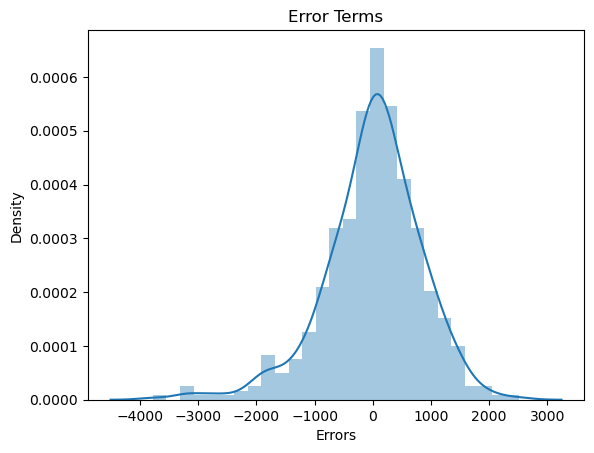

In [88]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')
plot_res_dist(y_train, y_train_pred)

In [89]:
##Errors are normally distribured here with mean 0. So everything seems to be fine

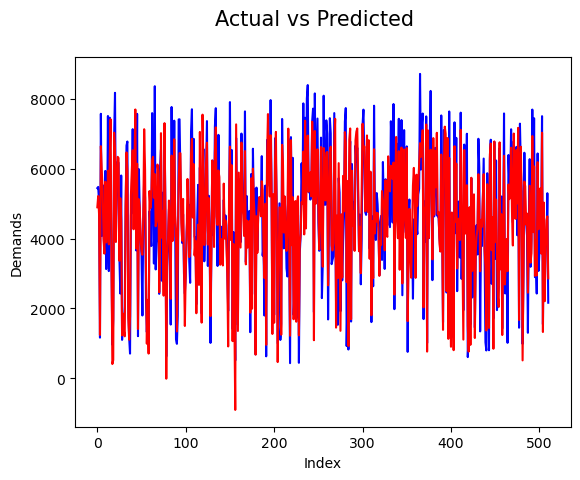

In [90]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

In [91]:
##Actual and Predicted result following almost the same pattern so this model seems ok

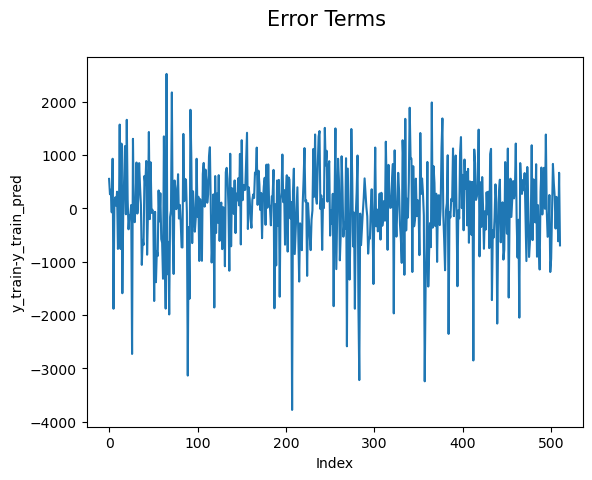

In [92]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

In [93]:
##Here,If we see the error terms are independent of each other.

In [94]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8115090363552069

In [95]:
##R2 Same as we obtained for our final model

# Linearity Check

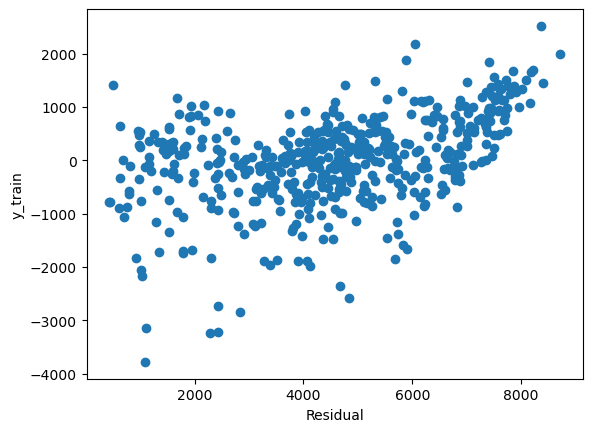

In [96]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

# Predict values for test data set

In [97]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [98]:
#Columns from our final model
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

# R-Squared value for test predictions

In [99]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8102146465462985

# Insight

In [100]:
#R2 value for predictions on test data (0.811) is almost same as R2 value of train data(0.810). 
#This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

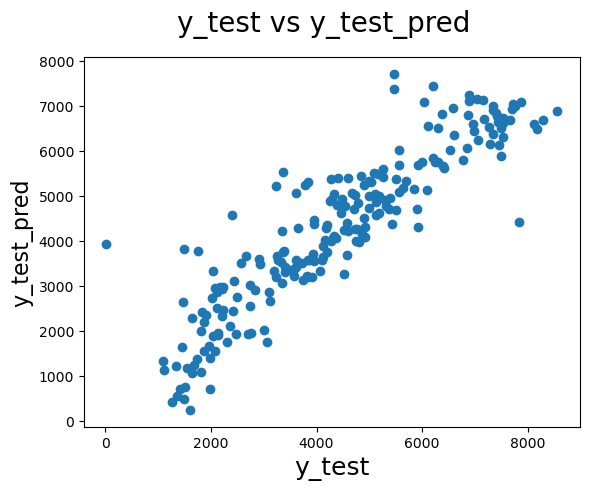

In [101]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)         
plt.ylabel('y_test_pred', fontsize = 16)

In [102]:
##We can observe that variance of the residuals (error terms) is constant across predictions. 
#i.e error term does not vary much as the value of the predictor variable changes.

# Plot Test vs Predicted test values

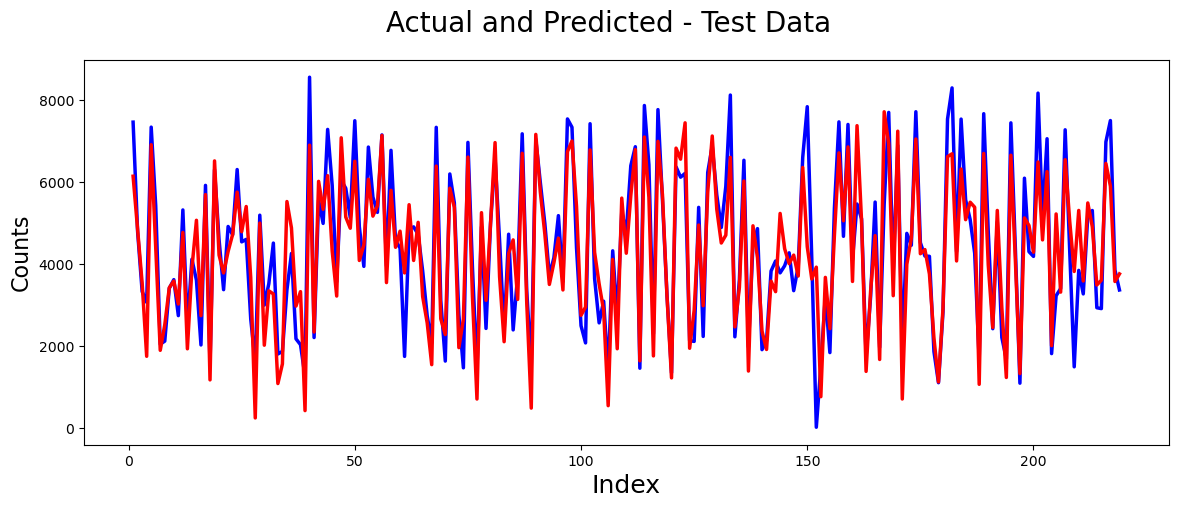

In [103]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)
    plt.xlabel('Index', fontsize=18)                               
    plt.ylabel('Counts', fontsize=16)                               
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

# Plot Error Terms for test data

In [104]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              
    plt.xlabel('Index', fontsize=18)                      
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                

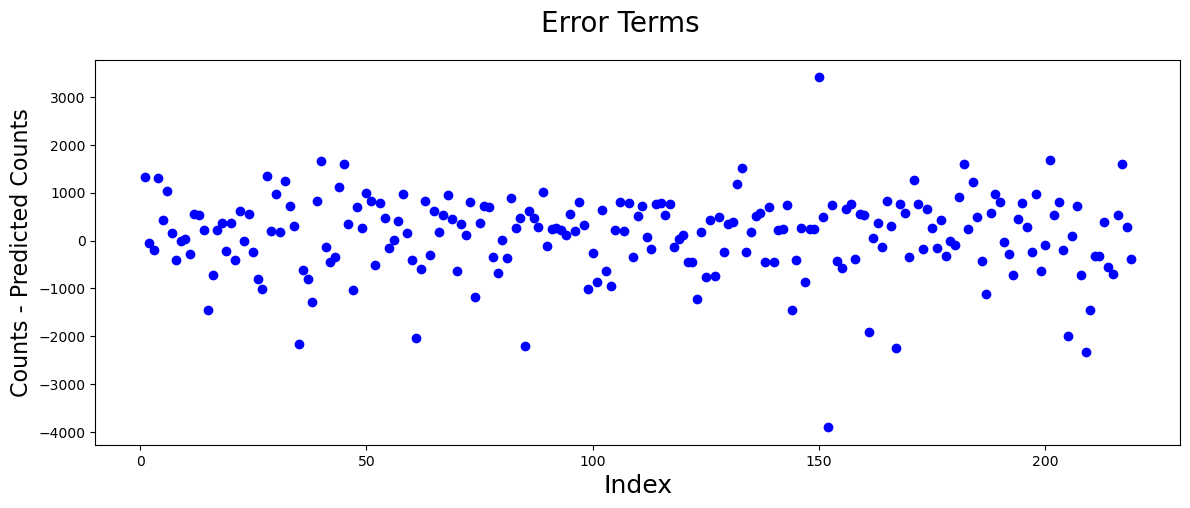

In [105]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

In [106]:
##As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by
#the model and there are no other parameters that can explain the model better.

In [107]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_old,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,1,14.110847,18.18125,80.5833,10.749882,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,1,1,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,1,0,...,0,0,0,0,0,0,1,0,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,1,0,...,0,0,0,0,0,0,0,0,1,0


# Intrepretting the Model

# Let us go with interpretting the RFE with Manual model results as we give more importance to imputation

In [108]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     270.2
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          1.81e-176
Time:                        19:12:13   Log-Likelihood:                -4166.3
No. Observations:                 511   AIC:                             8351.
Df Residuals:                     502   BIC:                             8389.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1673.8749    

In [113]:
df.drop(['weekday_sun'], axis=1, inplace=True)

In [114]:
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter',
       'weathersit_bad', 'weathersit_moderate', 'temp']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     307.0
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          4.76e-177
Time:                        19:16:31   Log-Likelihood:                -4167.9
No. Observations:                 511   AIC:                             8352.
Df Residuals:                     503   BIC:                             8386.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1701.7065    

In [116]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     307.0
Date:                Sun, 23 Jul 2023   Prob (F-statistic):          4.76e-177
Time:                        19:18:20   Log-Likelihood:                -4167.9
No. Observations:                 511   AIC:                             8352.
Df Residuals:                     503   BIC:                             8386.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1701.7065    206.409      8.244      0.000    1296.176    2107.237
yr                   2007.3414     75.624     26.544      0.000    1858.763    2155.920
season_spring       -1169.7402    147.472     -7.932      0.000   -1459.476    -880.004
mnth_jul             -619.4297    146.817     -4.219      0.000    -907.881    -330.979
season_winter         506.7637    112.374      4.510      0.000     285.983     727.544
weathersit_bad      -2255.1820    226.710     -9.947      0.000   -2700.597   -1809.767
weathersit_moderate  -654.0573     80.246     -8.151      0.000    -811.716    -496.399
temp                 4173.7819    284.023     14.695      0.000    3615.764    4731.800
==============================================================================
Omnibus:                       63.806   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.962
Skew:                          -0.730   Prob(JB):                     1.99e-27
Kurtosis:                       4.909   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Results

In [ ]:
##Analysing the above model, the comapany should focus on the following features:
#Company should focus on expanding business during Spring.
##Company should focus on expanding business during September.
#Based on previous data it is expected to have a boom in number of users once situation comes back to normal, compared to 2019.
##There would be less bookings during Light Snow or Rain, they could probably use this time to serive the bikes without having 
#business impact.
##Hence when the situation comes back to normal, the company should come up with new offers during spring when the weather 
#is pleasant and also advertise a little for September as this is when business would be at its best.

# Conclusion

In [ ]:
#Significant variables to predict the demand for shared bikes

#holiday
#temp
#hum
#windspeed
#Season
#months(January, July, September, November, December)
#Year (2019)
#Sunday
#weathersit( Light Snow, Mist + Cloudy)